<a href="https://colab.research.google.com/github/phice421/Aprendizado-nao-supervisionado/blob/main/Aprendizado_N%C3%A3o_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IA & Big Data**



## Clustering

In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd

from google_drive_downloader import GoogleDriveDownloader as gdd

# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

## Tarefa #1: Recebendo os dados

In [ ]:
data_google_id = '12Hm7WiRG46BRCRgq4B_daWTkx8jVQpQZ'
gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './Mall.csv',
                                    showsize = True)
dados = pd.read_csv("Mall.csv", sep=',')

0.0 B Done.


In [ ]:
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Esse conjunto de dados ilustra alguns dados dos consumidores de um shopping. **Será que podemos encontrar grupos de consumidores com os dados acima?**

Vamos primeiro analisar os nossos dados.

## Tarefa #2: Analisando os dados

A seguir vamos analisar os tipos de dados que temos.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dados.shape

(200, 5)

In [ ]:
dados.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

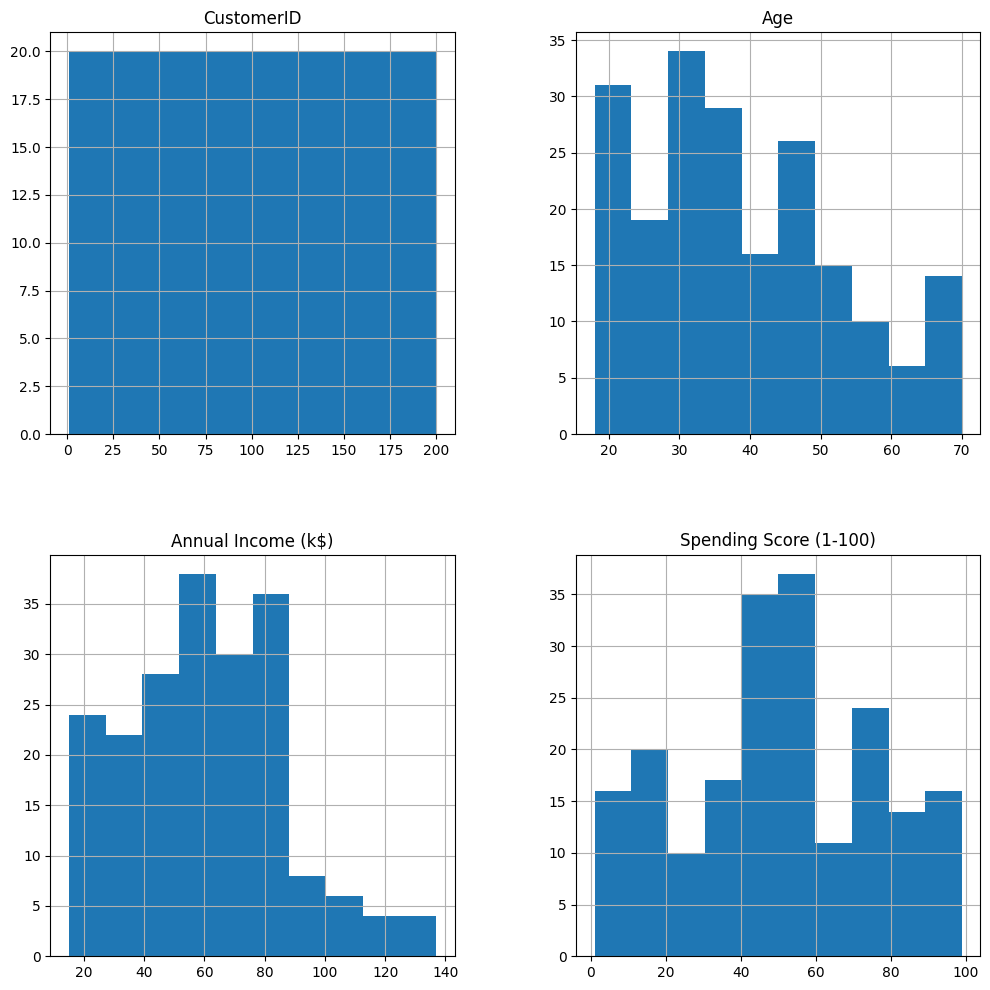

In [ ]:
dados.hist(figsize=(12,12))

In [ ]:
dados['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Boa proporção entre os generos que temos disponíveis em nossos dados.

Vamos fazer um gráfico completo com todos os dados para checarmos possíveis agrupamentos que podem ser realizados.

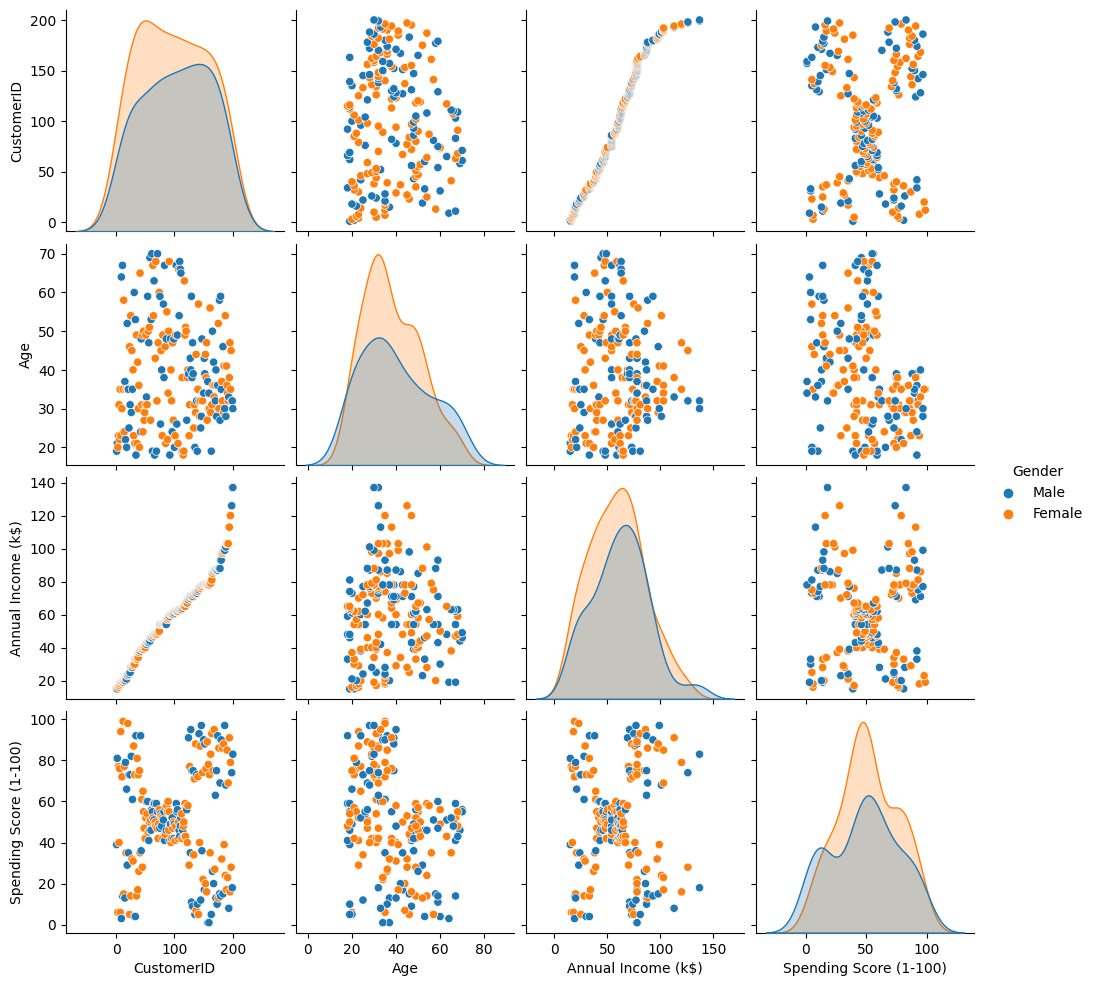

In [ ]:
sns.pairplot(dados, hue ='Gender')

Aparentemente o Annual Income e o Spending Score permitem alguns agrupamentos dos nossos dados. Podemos trabalhar com eles.

## Tarefa #3: Criando os agrupamentos

Vamos criar agrupamentos com diferentes metodologias:

### K-MEANS

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=6,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vamos analisar a nossa previsao e os centroides:

In [ ]:
pd.Series(kmeans_labels).value_counts()

1    81
0    35
5    28
4    23
3    22
2    11
dtype: int64

In [ ]:
centroides

array([[ 88.2       ,  17.11428571],
       [ 55.2962963 ,  49.51851852],
       [108.18181818,  82.72727273],
       [ 25.72727273,  79.36363636],
       [ 26.30434783,  20.91304348],
       [ 78.03571429,  81.89285714]])

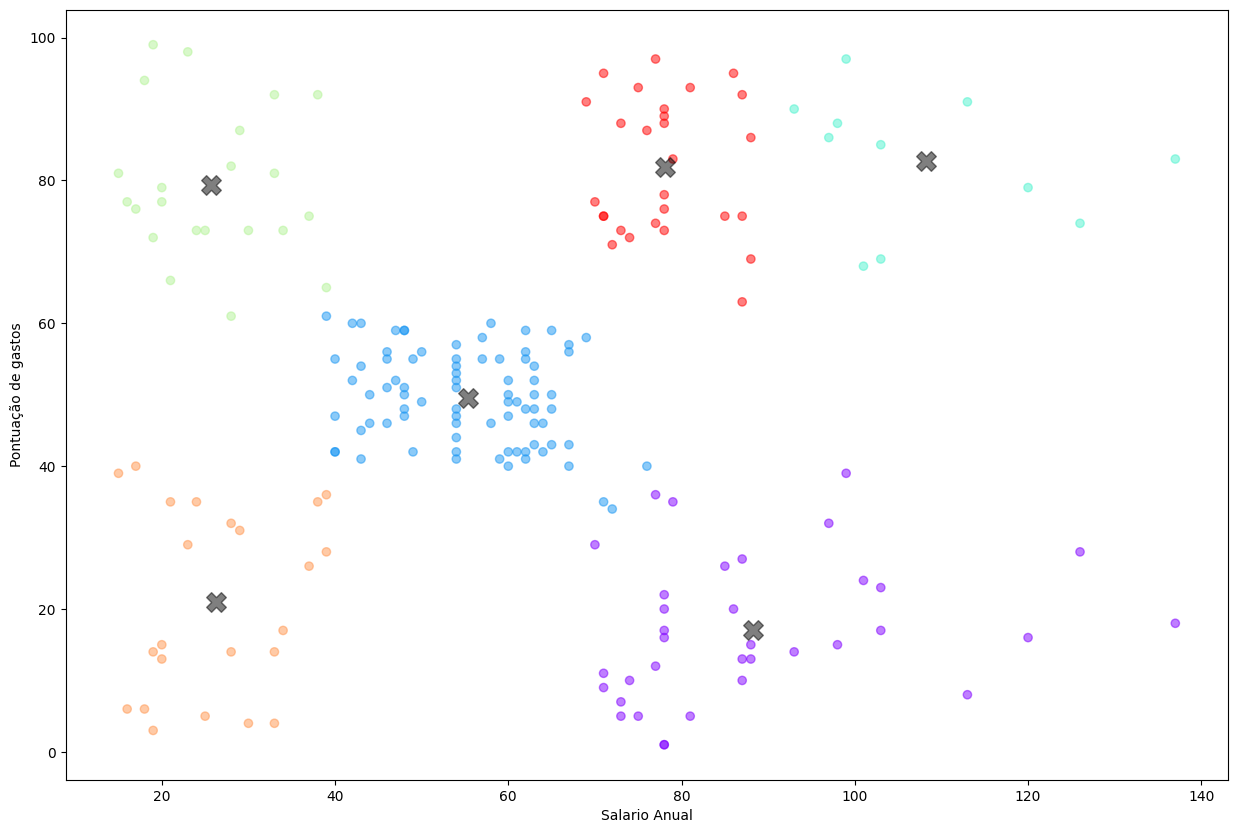

In [ ]:
# plotando os dados identificando com os seus clusters
plt.figure(figsize=(15, 10))
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow', )
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)

Escolhendo a quantidade de grupos usando o método do "cotovelo":

In [ ]:
# Lista com a quantidade de clusters que iremos testar
k = list(range(1, 10))

In [ ]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

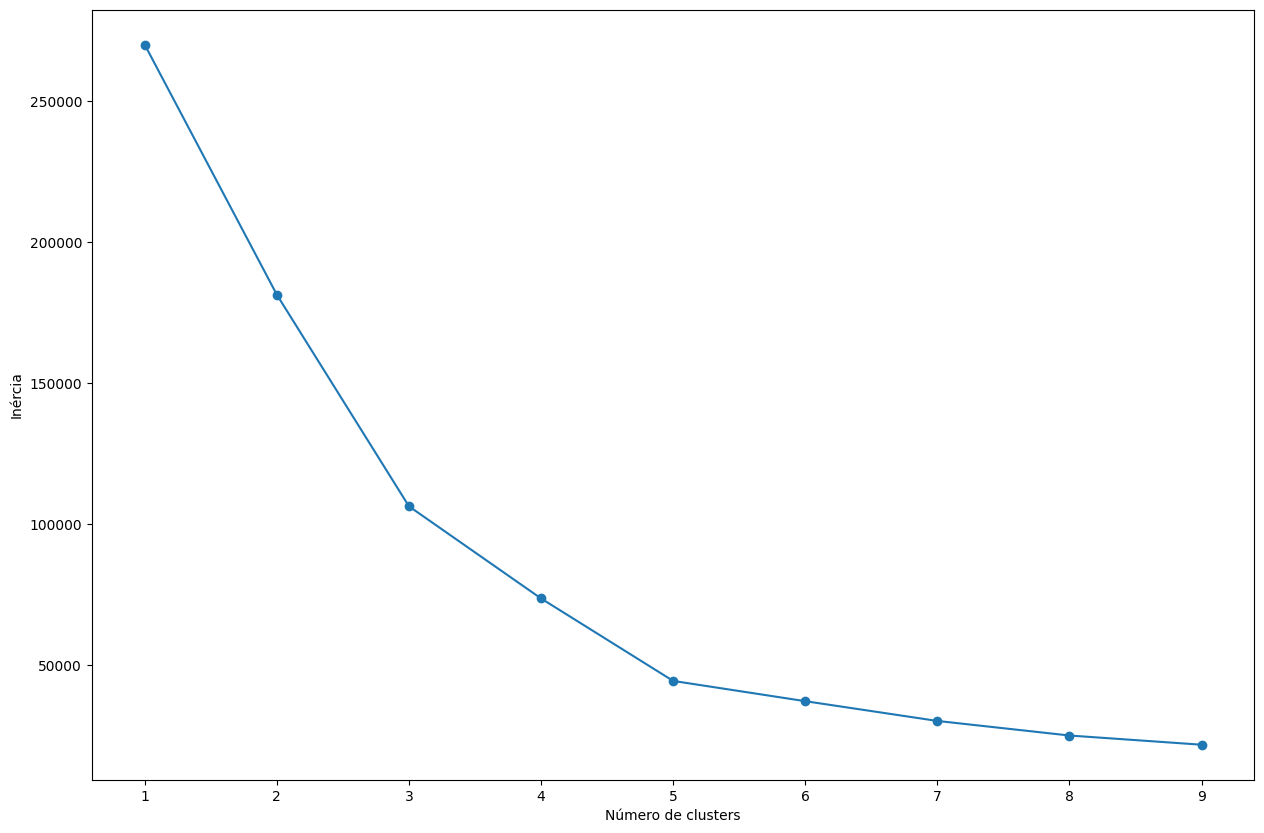

In [ ]:
# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(15, 10))
# Plota o gráfico com a soma dos erros quadraticos
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

Podemos notar que após 3 ou 5 clusters a soma do erro quadratico tem uma redução na forma com a qual a função está decrescendo. Assim podemos adotar 5 clusters. Checando os resultados para 5 clusters:

In [ ]:
# Definindo o modelo de clusterizacao. K-MEANS com 5 clusters
kmeans = KMeans(n_clusters=5,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


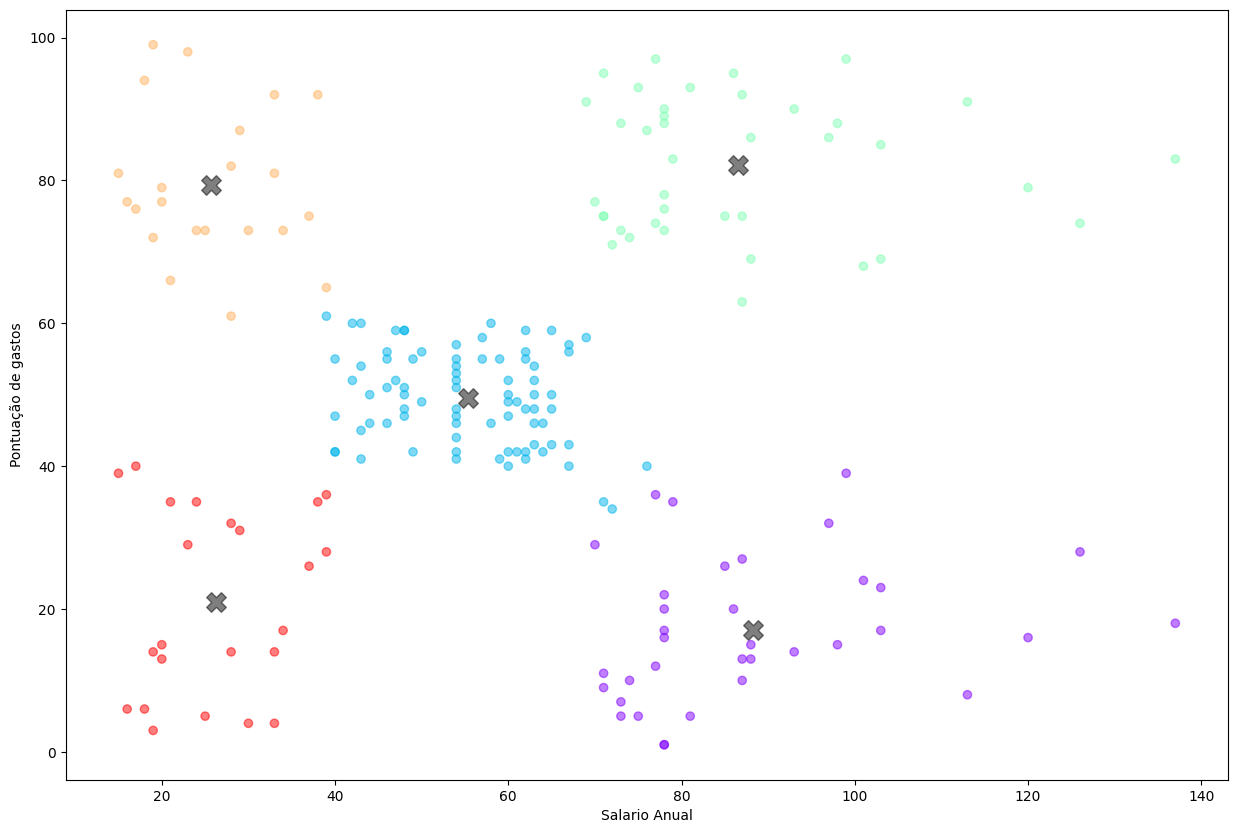

In [ ]:
# plotando os dados identificando com os seus clusters
plt.figure(figsize=(15, 10))
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

### Agrupamento Hierarquico

In [ ]:
# Com Scikit Learn
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Criando o modelo
# linkage = ‘ward’ minimizes the variance of the clusters being merged.
model = AgglomerativeClustering(n_clusters=5,linkage='ward')

model.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
hierarquico_labels = model.labels_
hierarquico_labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

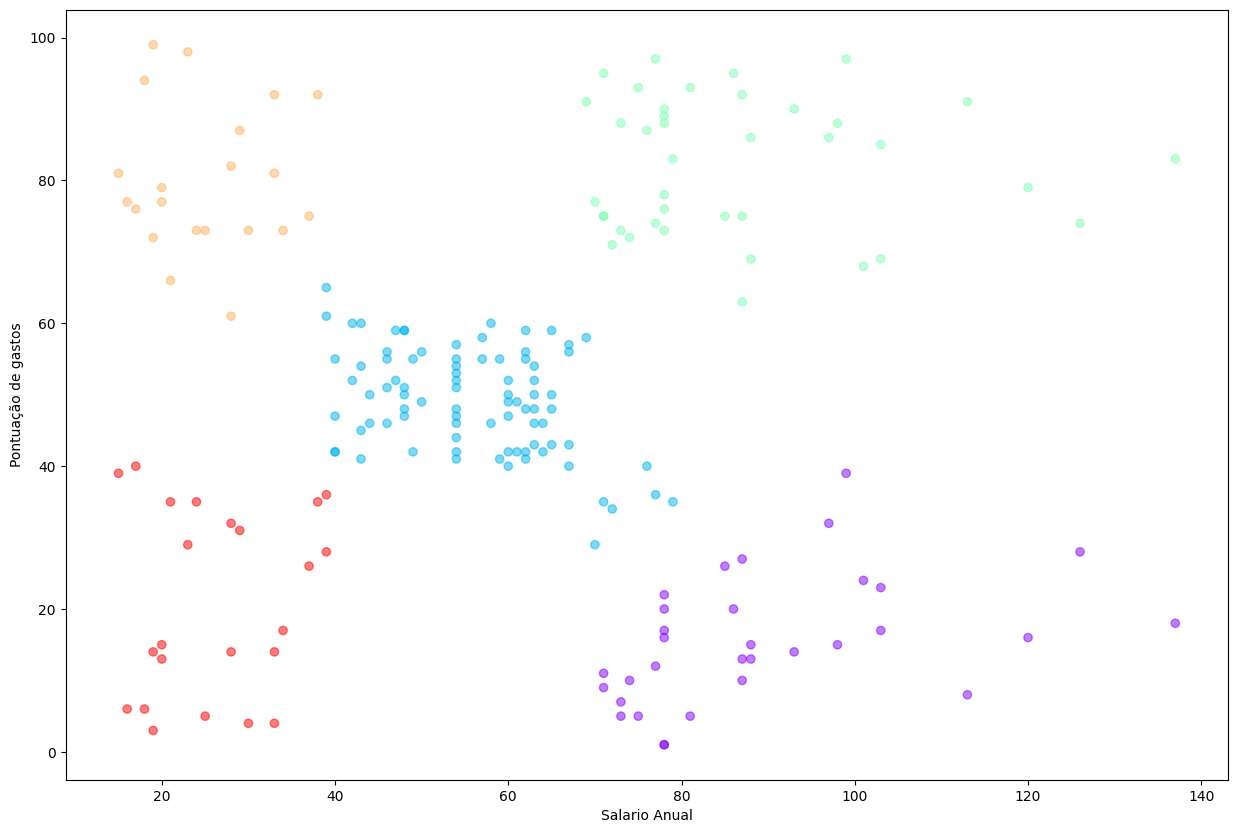

In [ ]:
# plotando os dados identificando com os seus clusters
plt.figure(figsize=(15, 10))
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=hierarquico_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.show()

Visualizando o dendrograma

Text(0, 0.5, 'Distância Euclidiana')

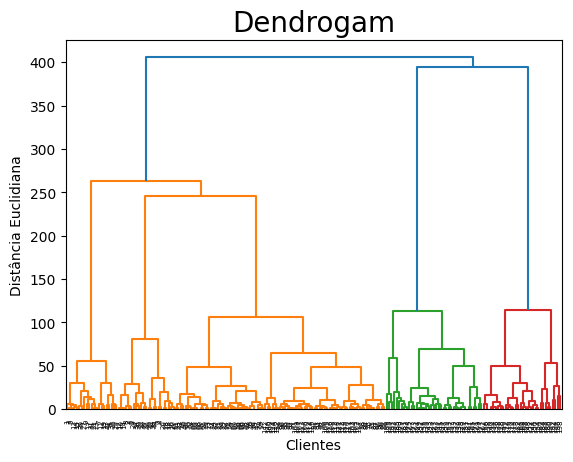

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(dados[['Annual Income (k$)','Spending Score (1-100)']], method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Clientes')
plt.ylabel('Distância Euclidiana')

### DBSCAN

Vamos agora utilizar o DBSCAN para gerar os agrupamentos

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
#Criando o modelo:
dbscan = DBSCAN(eps=10, min_samples=8)
#Ajustando aos dados
dbscan.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Labels com -1 foram classificados como outliers

Text(0, 0.5, 'Spending Score (1-100)')

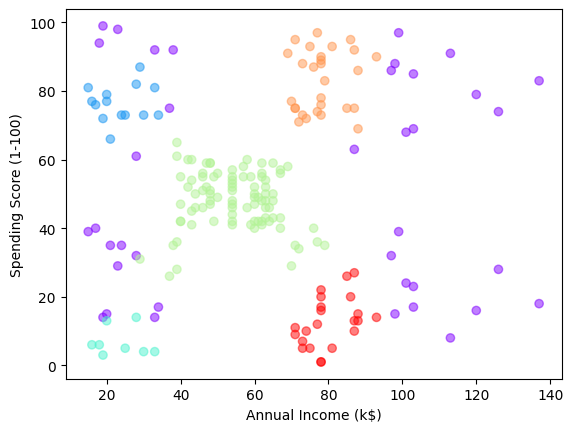

In [ ]:
#Plotando o grafico:
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

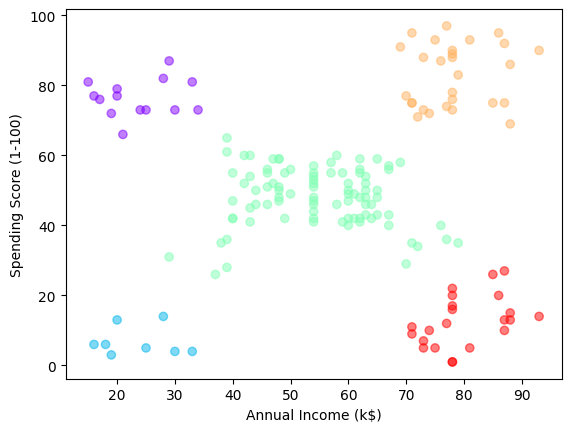

In [ ]:
#Plotando o grafico sem os outliers:
#mascara para outlier
mascara = dbscan_labels>=0

#plotando o gráfico
plt.scatter(dados[['Annual Income (k$)']][mascara],dados[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


Checando a quantidade de valores que foram classificados como Outliers:

In [ ]:
list(mascara).count(False)

38

# Tarefa #4: Avaliando as Métricas

- Vamos começar avaliando a métrica de Adjusted Rand index:

In [ ]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

Comparação entre K-Means e Agrupamento Hierarquico:

In [ ]:
adjusted_rand_score(kmeans_labels,hierarquico_labels)

0.9419606318143182

Comparação entre K-Means e DBSCAN:

In [ ]:
adjusted_rand_score(kmeans_labels,dbscan_labels)

0.7151933782093212

Comparação entre Agrupamento Hierarquico e o DBSCAN:

In [ ]:
adjusted_rand_score(hierarquico_labels,dbscan_labels)

0.7753880543390358

Percebemos que o KMeans e o Agrupamento hierarquico para esse caso conseguiram resultados mais próximos um do outro do que quando comparados com o DBSCAN

- Vamos começar avaliando a métrica de Silhouette:

KMEANS:

In [ ]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],kmeans_labels)

0.553931997444648

Agrupamento Hierarquico:

In [ ]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],hierarquico_labels)

0.5529945955148897

DBSCAN:

In [ ]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],dbscan_labels)

0.36328873885121793

# Extra: Agrupamento com dados de maiores dimensões

Os agrupamentos podem ser realizados não apenas com dados de duas dimensões, mas também para dados de maiores dimensões. Vamos ver a seguir um exemplo disso;

In [ ]:
x = dados[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values

# Definindo o modelo de clusterizacao. K-MEANS com 5 clusters
kmeans = KMeans(n_clusters=5, random_state = 0)

#Implementando o K-Means nos dados:
kmeans.fit(x)

#Salvando os labels dos clusters para cada exemplo
kmeans_y = kmeans.predict(dados.drop(columns=['Gender','CustomerID']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Plotando o gráfico:

In [ ]:
from mpl_toolkits import mplot3d

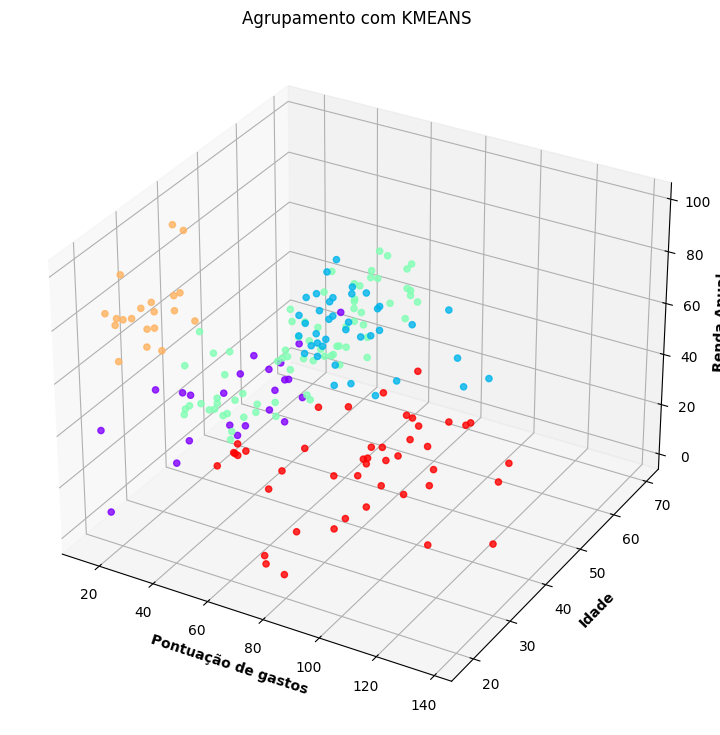

In [ ]:
x = dados[['Annual Income (k$)']]
y = dados[['Age']]
z = dados[['Spending Score (1-100)']]


# Criando a figura
fig = plt.figure(figsize = (9, 9))
ax = plt.axes(projection ="3d")
# Criando o plot

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = kmeans_y,
                    cmap='rainbow',
                    )

plt.title("Agrupamento com KMEANS")
ax.set_xlabel('Pontuação de gastos', fontweight ='bold')
ax.set_ylabel('Idade', fontweight ='bold')
ax.set_zlabel('Renda Anual', fontweight ='bold')

plt.show()

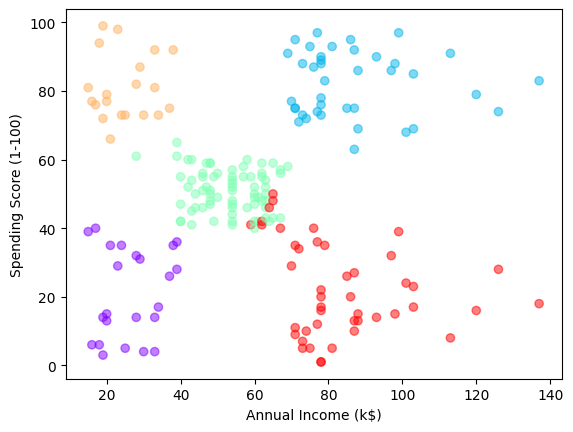

In [ ]:
#Plotando o grafico:
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_y, alpha=0.5, cmap='rainbow', )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Obtendo a métrica de Silhouette:

In [ ]:
silhouette_score(dados.drop(columns=['Gender','CustomerID']),kmeans_y)

0.41797139778609976

# Exercício:

Faça um estudo de agrupamentos utilizando as colunas de Idade (Age) e a Pontuação de gastos (Spending Score (1-100)). Caso você seja o dono de uma loja nesse shopping, qual o nome você atribuiria a cada cluster? Qual cluster é o melhor para que você tente atrair para o seu estabelecimento?

# Correção Exercício:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

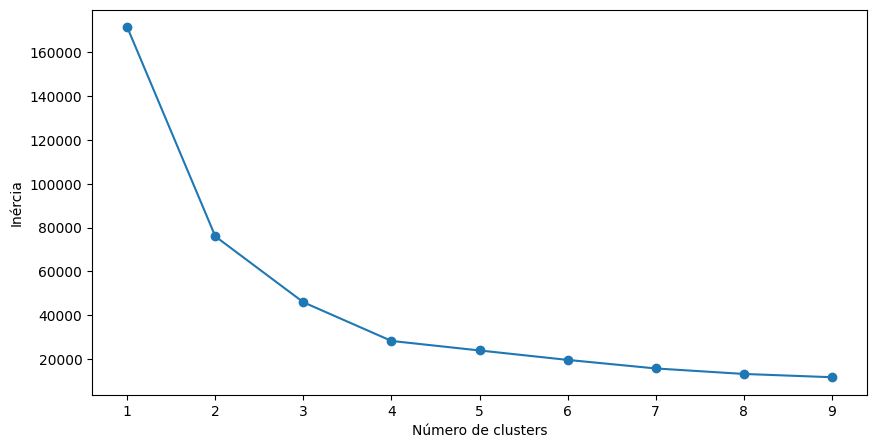

In [ ]:
# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Age', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (10, 5)
# Plota o gráfico com a soma dos erros quadraticos
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

Com o gráfico acima podemos definir 4 clusters.

In [ ]:
x = dados[['Age', 'Spending Score (1-100)']].values

# Definindo o modelo de clusterizacao. K-MEANS com 5 clusters
kmeans = KMeans(n_clusters=4, random_state = 0)

#Implementando o K-Means nos dados:
kmeans.fit(x)

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_y = kmeans.predict(dados[['Age', 'Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


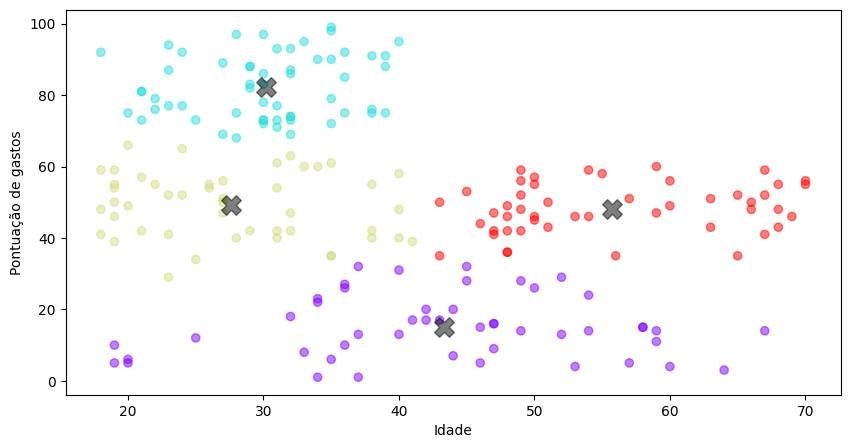

In [ ]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados['Age'],dados['Spending Score (1-100)'], c=kmeans_y, alpha=0.5, cmap='rainbow')
plt.xlabel('Idade')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

Podemos ver que há um grupo de até aproximadamente 40 anos com uma pontuação entre 60 e 100 pontos. Esses são os clientes fiéis da loja.

Temos dois clusters intermediários, um na mesma faixa etária dos clientes fiéis da loja. Por estarem na mesma faixa etária dos clientes fiéis existe uma oportunidade de tentar atrair alguns desses clientes para conseguir mais clientes fiéis. Esse cluster poderíamos chamar de clientes potenciais I.

Outro com uma idade entre 40 e 70 anos também se encontra na faixa etária. Não se trata da principal faixa etária que a loja consegue de clientes fiéis. Como há uma grande quantidade de clientes nessa faixa etária e com uma boa pontuação, podemos chamá-los de clientes potenciais II.

Por o ultimo cluster tem apenas os valores baixos de pontuação dos clientes. Assim, esses seriam os clientes regulares.